# Intro to keras as part of Tensorflow
    - Load MNIST dataset
    - Linear model
    - Neural model
    - Convolutional model

In [1]:
from __future__ import print_function

#Basic libraries
import numpy as np
import tensorflow as tf
print('Tensorflow version: ', tf.__version__)
import time

#Show images
import matplotlib.pyplot as plt
%matplotlib inline
# plt configuration
plt.rcParams['figure.figsize'] = (10, 10)        # size of images
plt.rcParams['image.interpolation'] = 'nearest'  # show exact image
plt.rcParams['image.cmap'] = 'gray'  # use grayscale 


/home/ubuntu/anaconda3/envs/tf18/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version:  1.8.0


In [2]:
# Select GPU
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15367736955144122742
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285974221
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8170669686622735436
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


## Get some data

In [3]:
# Import mnist dataset and rescale between [0,1]

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (60000, 28, 28)
y train shape:  (60000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


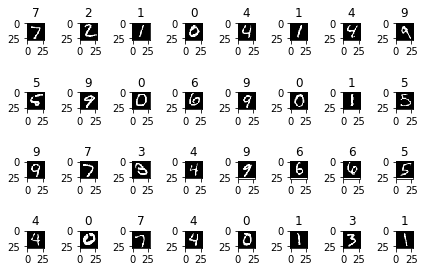

In [4]:
#Examine the data
plt.rcParams['figure.figsize'] = (10, 10)

fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title(str(y_test[i]))
    fig.tight_layout()
    plt.imshow(X_test[i])
    

## Linear model

In [5]:
print('Linear model...')

images = tf.keras.layers.Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = tf.keras.layers.Flatten(name='Flat_image')(images)
output = tf.keras.layers.Dense(10, activation='softmax', name='Dense_output')(flat)

# Model Architecture defined
model_linear = tf.keras.models.Model(inputs=images, outputs=output)
model_linear.summary()


Linear model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          (None, 28, 28)            0         
_________________________________________________________________
Flat_image (Flatten)         (None, 784)               0         
_________________________________________________________________
Dense_output (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Select optimizer and compile model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=sgd_optimizer, metrics=['accuracy'])

In [7]:
# Train the model
start = time.time()

tb_callback_ln = tf.keras.callbacks.TensorBoard(log_dir='./tensorboard/keras/linear/')

history_linear = model_linear.fit(X_train, y_train, batch_size=128, epochs=50,
                                  verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_ln])

print('Seconds to train: ', time.time() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 241us/step - loss: 1.2765 - acc: 0.7069 - val_loss: 0.8109 - val_acc: 0.8337
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.7145 - acc: 0.8403 - val_loss: 0.6074 - val_acc: 0.8639
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.5869 - acc: 0.8596 - val_loss: 0.5254 - val_acc: 0.8746
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.5255 - acc: 0.8689 - val_loss: 0.4799 - val_acc: 0.8803
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.4881 - acc: 0.8755 - val_loss: 0.4502 - val_acc: 0.8860
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.4623 - acc: 0.8803 - val_loss: 0.4289 - val_acc: 0.8885
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.4431 - acc: 0.8829 - val_loss: 0.4129 - val_a

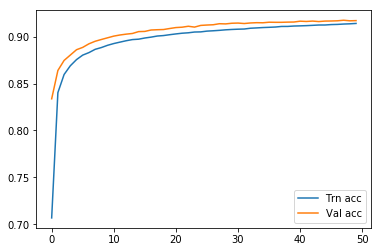

In [8]:
plt.plot(history_linear.history['acc'], label='Trn acc')
plt.plot(history_linear.history['val_acc'], label='Val acc')
plt.legend(loc='lower right')
plt.show()

In [9]:
# Score and select prediction with max prob
import numpy as np
p_test = model_linear.predict(X_test)
pred_test = np.argmax(p_test, axis=1)


#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[ 959    0    2    2    0    5    9    1    2    0]
 [   0 1105    2    2    0    3    4    1   18    0]
 [  11    5  905   16   13    1   15   16   42    8]
 [   3    1   21  918    1   23    3   12   17   11]
 [   1    1    4    1  916    0   11    2    8   38]
 [  10    3    5   34    8  770   16    7   31    8]
 [  15    3    3    2   14   13  904    1    3    0]
 [   2   13   22    8    8    0    0  938    2   35]
 [   9    9    8   21    9   24   13   14  857   10]
 [  12    7    3   10   42    7    0   24    6  898]]


## Neural network model 

In [10]:
print('NN model...')

images = tf.keras.layers.Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat   = tf.keras.layers.Flatten(name='Flat_image')(images)
dense  = tf.keras.layers.Dense(500, activation='relu', name='Dense_layer')(flat)
output = tf.keras.layers.Dense(10, activation='softmax', name='Dense_output')(dense)

# Model Architecture defined
model_nn = tf.keras.models.Model(inputs=images, outputs=output)
model_nn.summary()


NN model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          (None, 28, 28)            0         
_________________________________________________________________
Flat_image (Flatten)         (None, 784)               0         
_________________________________________________________________
Dense_layer (Dense)          (None, 500)               392500    
_________________________________________________________________
Dense_output (Dense)         (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_nn.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=sgd_optimizer, metrics=['accuracy'])


In [12]:
# Train the model
start = time.time()

tb_callback_nn = tf.keras.callbacks.TensorBoard(log_dir='./tensorboard/keras/neural/')

history_nn = model_nn.fit(X_train, y_train, batch_size=128, epochs=50,
                    verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_nn])

print('Seconds to train: ', time.time() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 1.0965 - acc: 0.7639 - val_loss: 0.5863 - val_acc: 0.8733
Epoch 2/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.5156 - acc: 0.8750 - val_loss: 0.4267 - val_acc: 0.8943
Epoch 3/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.4168 - acc: 0.8913 - val_loss: 0.3690 - val_acc: 0.9033
Epoch 4/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3721 - acc: 0.8997 - val_loss: 0.3369 - val_acc: 0.9089
Epoch 5/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3444 - acc: 0.9054 - val_loss: 0.3161 - val_acc: 0.9135
Epoch 6/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3246 - acc: 0.9103 - val_loss: 0.3012 - val_acc: 0.9161
Epoch 7/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3091 - acc: 0.9138 - val_loss: 0.2878 - val_acc

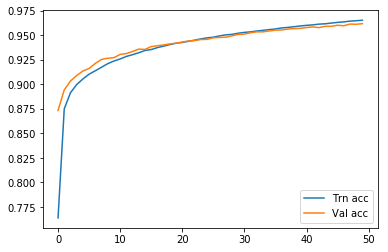

In [13]:
plt.plot(history_nn.history['acc'], label='Trn acc')
plt.plot(history_nn.history['val_acc'], label='Val acc')
plt.legend(loc='lower right')
plt.show()

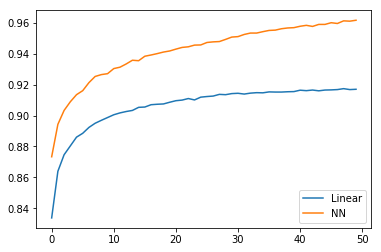

In [14]:
# Compare the two models
plt.plot(history_linear.history['val_acc'], label='Linear')
plt.plot(history_nn.history['val_acc'], label='NN')
plt.legend(loc='lower right')
plt.show()

## Convolutional model

In [15]:
#Define the model
print('Convolutional model...')
print('LeNet architecture.')

#Inputs
images = tf.keras.layers.Input(batch_shape=(None, 28, 28, 1), dtype='float32', name='Images')

#First convolutional layer
conv1 = tf.keras.layers.Conv2D(20, (5,5))(images)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

#Second convolutional layer
conv2 = tf.keras.layers.Conv2D(20, (5,5))(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

#Flatten convolution output
flat = tf.keras.layers.Flatten(name='Flat_image')(pool2)

# First dense layer
dense1 = tf.keras.layers.Dense(500, activation='relu', name='Dense_1')(flat)

# Second dense layer
output = tf.keras.layers.Dense(10, activation='softmax', name='Dense_output')(dense1)

# Model Architecture defined
model_conv = tf.keras.models.Model(inputs=images, outputs=output)
model_conv.summary()


Convolutional model...
LeNet architecture.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
Flat_image (Flatten)         (None, 320)               0         
_________________________________________________________________
Dense_1 (Dense)              (Non

In [16]:
# Compile model and select optimizer
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [17]:
# Train the model
X_train_img = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test_img = X_test.reshape(X_test.shape[0], 28, 28, 1)

start = time.time()

tb_callback_cnn = tf.keras.callbacks.TensorBoard(log_dir='./tensorboard/keras/CNN/')

history = model_conv.fit(X_train_img, y_train, batch_size=128, epochs=10,
                    verbose=1, validation_data=(X_test_img, y_test), callbacks=[tb_callback_cnn])

print('Seconds to train: ', time.time() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 728us/step - loss: 1.0300 - acc: 0.7297 - val_loss: 0.3402 - val_acc: 0.8982
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2871 - acc: 0.9153 - val_loss: 0.2299 - val_acc: 0.9338
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2103 - acc: 0.9371 - val_loss: 0.1709 - val_acc: 0.9502
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1676 - acc: 0.9504 - val_loss: 0.1404 - val_acc: 0.9569
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.1394 - acc: 0.9591 - val_loss: 0.1290 - val_acc: 0.9581
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.1199 - acc: 0.9649 - val_loss: 0.1182 - val_acc: 0.9655
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1059 - acc: 0.9688 - val_loss: 0.0897 - val_a

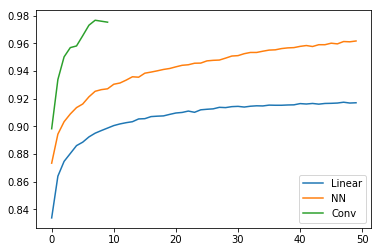

In [18]:
#Compare with previous
# Compare the two models
plt.plot(history_linear.history['val_acc'], label='Linear')
plt.plot(history_nn.history['val_acc'], label='NN')
plt.plot(history.history['val_acc'], label='Conv')
plt.legend(loc='lower right')
plt.show()


In [19]:
# Score and select prediction with max prob
import numpy as np
p_test = model_conv.predict(X_test_img)
pred_test = np.argmax(p_test, axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_test))

[[ 970    0    1    1    0    1    4    1    2    0]
 [   0 1128    2    1    0    0    2    0    2    0]
 [   1    1 1015    6    1    1    0    6    1    0]
 [   1    0    3  996    0    3    0    4    3    0]
 [   1    0    5    1  927    1    5    4    2   36]
 [   2    1    0   12    0  868    4    2    1    2]
 [   5    3    0    1    1    2  946    0    0    0]
 [   0    6   14    3    0    0    0  999    1    5]
 [   3    1    4   12    2    5    4    6  933    4]
 [   4    6    1   11    2    6    1    7    0  971]]


n:  1 - Pred 1: 7(0.360) - Pred 2: 8(0.316)
n:  2 - Pred 1: 2(0.974) - Pred 2: 4(0.015)
n:  3 - Pred 1: 0(0.947) - Pred 2: 6(0.027)
n:  4 - Pred 1: 1(0.569) - Pred 2: 9(0.245)
n:  5 - Pred 1: 7(0.521) - Pred 2: 2(0.351)
n:  6 - Pred 1: 3(0.894) - Pred 2: 5(0.104)
n:  7 - Pred 1: 0(0.811) - Pred 2: 6(0.138)
n:  8 - Pred 1: 5(0.668) - Pred 2: 3(0.332)
n:  9 - Pred 1: 2(0.714) - Pred 2: 0(0.230)
n: 10 - Pred 1: 9(0.526) - Pred 2: 4(0.468)
n: 11 - Pred 1: 9(0.765) - Pred 2: 4(0.228)
n: 12 - Pred 1: 2(0.741) - Pred 2: 3(0.115)
n: 13 - Pred 1: 7(0.808) - Pred 2: 3(0.090)
n: 14 - Pred 1: 3(0.499) - Pred 2: 8(0.363)
n: 15 - Pred 1: 3(0.296) - Pred 2: 1(0.282)
n: 16 - Pred 1: 3(0.337) - Pred 2: 7(0.336)
n: 17 - Pred 1: 9(0.994) - Pred 2: 4(0.004)
n: 18 - Pred 1: 6(0.393) - Pred 2: 0(0.321)
n: 19 - Pred 1: 8(0.692) - Pred 2: 6(0.172)
n: 20 - Pred 1: 9(0.913) - Pred 2: 4(0.082)
n: 21 - Pred 1: 2(0.555) - Pred 2: 7(0.404)
n: 22 - Pred 1: 7(0.509) - Pred 2: 9(0.432)
n: 23 - Pred 1: 9(0.580) - Pred 

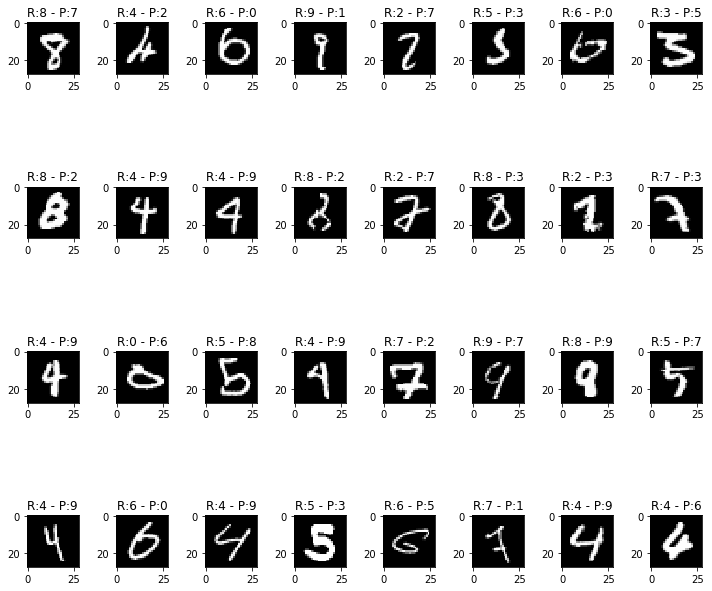

In [21]:
#Print probabilities to the first erros
plt.rcParams['figure.figsize'] = (10, 10)

test_errors=[]
test_errors_real=[]
test_errors_predict=[]
num_errors = 32
n = 0
for i in range(len(pred_test)):
    if pred_test[i] != y_test[i] and n < num_errors: #Error!
        n += 1
        test_errors += [X_test_img[i,:,:,0]]
        test_errors_real += [y_test[i]]
        test_errors_predict += [pred_test[i]]
        
        #Print first propabilities
        index = p_test[i].argsort()[::-1]
        print('n: %2i - Pred 1: %1i(%0.3f) - Pred 2: %1i(%0.3f)' % (n,
              index[0], p_test[i][index[0]], index[1], p_test[i][index[1]]))
        
print("Num errors: ", len(test_errors))


#Plot 32 images wrong classified.
fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title('R:'+str(test_errors_real[i])+' - P:'+str(test_errors_predict[i]))
    fig.tight_layout()
    plt.imshow(test_errors[i])
    

# Example of usage of a generator to provide data to the training
    - Define a batch generator
    - Use it in the train process

In [22]:
# New model. Equal to the last.
model_conv2 = tf.keras.models.Model(inputs=images, outputs=output)

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.99, decay=0.005, nesterov=True)
model_conv2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [23]:
# Define a generator to X_train. Same code to an HDF5 source
def batch_generator(X, y, batch_size=64):
    data_size = X.shape[0]
    while 1:
        # Randomize batches in each epoch
        batch_randomized = np.random.permutation(range(0, data_size-batch_size, batch_size))
        # Iterate over each batch
        for batch in batch_randomized:
            x_batch = X[batch : batch+batch_size]
            y_batch = y[batch : batch+batch_size]
            yield x_batch, y_batch

In [24]:
#Test the generator
seq = batch_generator(X_train_img, y_train)    
next_seq = next(seq)
print(next_seq[0][0].shape)
print(next_seq[1])


(28, 28, 1)
[0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6 4 7 1 8 9 9 3
 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3]


In [25]:
# Train using the fit_generator function

# Number of steps to use all the train data in a epoch.
steps = X_train.shape[0]//64

history = model_conv2.fit_generator(batch_generator(X_train_img, y_train, batch_size=64),
                                    steps_per_epoch=steps, 
                                    epochs=10,
                                    verbose=1, 
                                    validation_data=(X_test_img, y_test))


Epoch 1/10
937/937 [==============================] - 5s 6ms/step - loss: 0.1217 - acc: 0.9653 - val_loss: 0.0451 - val_acc: 0.9858
Epoch 2/10
937/937 [==============================] - 5s 5ms/step - loss: 0.0349 - acc: 0.9895 - val_loss: 0.0340 - val_acc: 0.9883
Epoch 3/10
937/937 [==============================] - 5s 5ms/step - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0316 - val_acc: 0.9893
Epoch 4/10
937/937 [==============================] - 5s 5ms/step - loss: 0.0125 - acc: 0.9962 - val_loss: 0.0312 - val_acc: 0.9895
Epoch 5/10
937/937 [==============================] - 5s 5ms/step - loss: 0.0092 - acc: 0.9977 - val_loss: 0.0301 - val_acc: 0.9901
Epoch 6/10
937/937 [==============================] - 5s 5ms/step - loss: 0.0076 - acc: 0.9981 - val_loss: 0.0302 - val_acc: 0.9905
Epoch 7/10
937/937 [==============================] - 5s 5ms/step - loss: 0.0062 - acc: 0.9987 - val_loss: 0.0306 - val_acc: 0.9904
Epoch 8/10
937/937 [==============================] - 5s 5ms/step - loss: 0.